In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [90]:
df = pd.read_json('https://api.covid19india.org/raw_data.json', orient='columns')
df.shape

(6883, 1)

In [91]:
df.head()

,raw_data
0,"{'agebracket': '20', 'backupnotes': 'Student f..."
1,"{'agebracket': '', 'backupnotes': 'Student fro..."
2,"{'agebracket': '', 'backupnotes': 'Student fro..."
3,"{'agebracket': '45', 'backupnotes': 'Travel hi..."
4,"{'agebracket': '24', 'backupnotes': 'Travel hi..."


In [92]:
from collections import defaultdict 

In [93]:
new_dict = defaultdict(list) 

In [94]:
for i in df['raw_data']:
    for k,v in i.items():
        if k == 'agebracket':
            new_dict['agebracket'].append(v)
        elif k == 'backupnotes':
            new_dict['backupnotes'].append(v)
        elif k == 'contractedfromwhichpatientsuspected':
            new_dict['contractedfromwhichpatientsuspected'].append(v)
        elif k == 'currentstatus':
            new_dict['currentstatus'].append(v)
        elif k == 'dateannounced':
            new_dict['dateannounced'].append(v)
        elif k == 'detectedcity':
            new_dict['detectedcity'].append(v)
        elif k == 'detecteddistrict':
            new_dict['detecteddistrict'].append(v)
        elif k == 'detectedstate':
            new_dict['detectedstate'].append(v)
        elif k == 'estimatedonsetdate':
            new_dict['estimatedonsetdate'].append(v)
        elif k == 'gender':
            new_dict['gender'].append(v)
        elif k == 'nationality':
            new_dict['nationality'].append(v)
        elif k == 'notes':
            new_dict['notes'].append(v)
        elif k == 'patientnumber':
            new_dict['patientnumber'].append(v)
        elif k == 'source1':
            new_dict['source1'].append(v)
        elif k == 'source2':
            new_dict['source2'].append(v)
        elif k == 'source3':
            new_dict['source3'].append(v)
        elif k == 'statecode':
            new_dict['statecode'].append(v)
        elif k == 'statepatientnumber':
            new_dict['statepatientnumber'].append(v)
        elif k == 'statuschangedate':
            new_dict['statuschangedate'].append(v)
        elif k == 'typeoftransmission':
            new_dict['typeoftransmission'].append(v)
    
           

In [95]:
df = pd.DataFrame(new_dict)
df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   agebracket                           6883 non-null   object
 1   backupnotes                          6883 non-null   object
 2   contractedfromwhichpatientsuspected  6883 non-null   object
 3   currentstatus                        6883 non-null   object
 4   dateannounced                        6883 non-null   object
 5   detectedcity                         6883 non-null   object
 6   detecteddistrict                     6883 non-null   object
 7   detectedstate                        6883 non-null   object
 8   estimatedonsetdate                   6883 non-null   object
 9   gender                               6883 non-null   object
 10  nationality                          6883 non-null   object
 11  notes                                6883 n

In [97]:
df.drop(['source1', 'source2', 'source3', 'detectedcity', 'patientnumber', 'estimatedonsetdate', 'backupnotes', 'contractedfromwhichpatientsuspected', 'notes', 'statepatientnumber'], axis = 1, inplace = True)

In [98]:
df.head()

,agebracket,currentstatus,dateannounced,detecteddistrict,detectedstate,gender,nationality,statecode,statuschangedate,typeoftransmission
0,20,Recovered,30/01/2020,Thrissur,Kerala,F,India,KL,14/02/2020,Imported
1,,Recovered,02/02/2020,Alappuzha,Kerala,,India,KL,14/02/2020,Imported
2,,Recovered,03/02/2020,Kasaragod,Kerala,,India,KL,14/02/2020,Imported
3,45,Recovered,02/03/2020,East Delhi,Delhi,M,India,DL,15/03/2020,Imported
4,24,Recovered,02/03/2020,Hyderabad,Telangana,M,India,TG,02/03/2020,Imported


In [101]:
print(df.shape)
df = df.loc[df['agebracket'] != '']
df.shape

(6883, 10)


(1086, 10)

In [103]:
for col in df.columns:
    print(df[col].unique())

['20' '45' '24' '69' '55' '70' '16' '27' '59' '65' '75' '54' '53' '61'
 '25' '63' '3' '48' '40' '13' '96' '89' '85' '46' '68' '26' '76' '33' '37'
 '43' '21' '32' '47' '42' '44' '51' '31' '29' '67' '49' '52' '22' '18'
 '34' '28' '56' '35' '50' '30' '38' '23' '19' '58' '41' '2' '60' '74' '39'
 '17' '36' '57' '64' '81' '62' '9' '7' '66' '12' '1' '14' '11' '6' '73'
 '28-35' '92' '72' '15' '77' '10' '80' '71' '78' '90' '4' '8']
['Recovered' 'Hospitalized' 'Deceased']
['30/01/2020' '02/03/2020' '03/03/2020' '04/03/2020' '05/03/2020'
 '07/03/2020' '08/03/2020' '09/03/2020' '10/03/2020' '11/03/2020'
 '12/03/2020' '14/03/2020' '15/03/2020' '16/03/2020' '17/03/2020'
 '18/03/2020' '19/03/2020' '20/03/2020' '21/03/2020' '22/03/2020'
 '23/03/2020' '24/03/2020' '25/03/2020' '26/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '30/03/2020' '31/03/2020' '01/04/2020'
 '02/04/2020' '03/04/2020' '04/04/2020' '05/04/2020' '06/04/2020'
 '07/04/2020' '08/04/2020' '09/04/2020' '10/04/2020']
['Thrissur' 'East

In [104]:
print(df.shape)
df = df.loc[df['gender'] != '']
df.shape

(1086, 10)


(1016, 10)

In [108]:
df.loc[df['agebracket'] == '28-35', 'agebracket'] = '32'

In [109]:
df['agebracket'] = pd.to_numeric(df['agebracket'])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 6770
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   agebracket          1016 non-null   int64 
 1   currentstatus       1016 non-null   object
 2   dateannounced       1016 non-null   object
 3   detecteddistrict    1016 non-null   object
 4   detectedstate       1016 non-null   object
 5   gender              1016 non-null   object
 6   nationality         1016 non-null   object
 7   statecode           1016 non-null   object
 8   statuschangedate    1016 non-null   object
 9   typeoftransmission  1016 non-null   object
dtypes: int64(1), object(9)
memory usage: 87.3+ KB


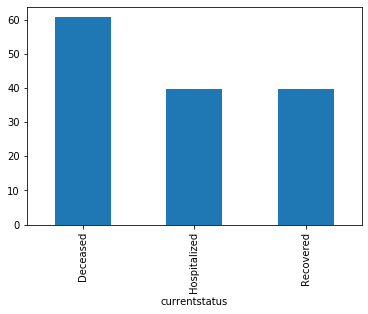

In [115]:
df.groupby('currentstatus')['agebracket'].mean().plot(kind='bar')

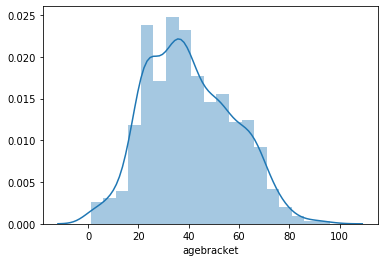

In [117]:
sns.distplot(df['agebracket'])

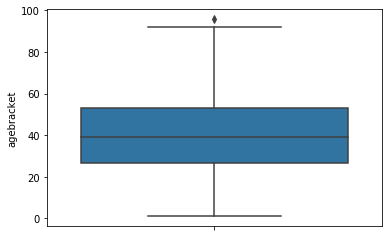

In [119]:
sns.boxplot(y='agebracket', hue='currentstatus', data = df)